In [1]:
import modesolverpy.mode_solver as ms
import modesolverpy.structure as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
w_wg_list = [round(0.2 +0.01*i,2) for i in range(0,81)]
total_list = []

In [3]:
print(w_wg_list)

[0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [4]:
def find_n_eff(wg_width:float)->float:
    x_step = 0.02
    y_step = 0.02
    sub_height = 0.5
    sub_width = 2.
    n_sub = 1.4
    n_wg = 3.4
    n_clad = 1.
    wavelength = 1.55
    angle = 90.
    clad_height = 0.5
    wg_height = 0.4
    film_thickness = 0.5
    structure = st.RidgeWaveguide(wavelength, x_step, y_step, wg_height,wg_width,sub_height,sub_width,clad_height,n_sub,n_wg,angle,n_clad,film_thickness)
    mode_solver = ms.ModeSolverSemiVectorial(4, semi_vectorial_method='Ex')
    a = mode_solver.solve(structure)
    mode_solver.write_modes_to_file('example_modes_1.dat')
    return a["n_effs"].real

array([2.85753574, 2.21031313, 2.02184258, 1.85015389])

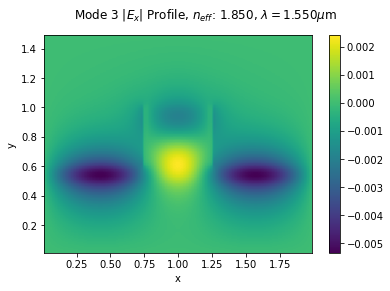

In [5]:
find_n_eff(0.48)

In [6]:
def structure(wg_width:float)->float:
    x_step = 0.02
    y_step = 0.02
    sub_height = 0.5
    sub_width = 2.
    n_sub = 1.4
    n_wg = 3.4
    n_clad = 1.
    wavelength = 1.31
    angle = 90.
    clad_height = 0.5
    wg_height = 0.4
    film_thickness = 0.5
    b = st.RidgeWaveguide(wavelength, x_step, y_step, wg_height,wg_width,sub_height,sub_width,clad_height,n_sub,n_wg,angle,n_clad,film_thickness)
    return b

In [7]:
k = structure(0.49)

[3.0019546  2.51266756 2.28501388 2.08867483]


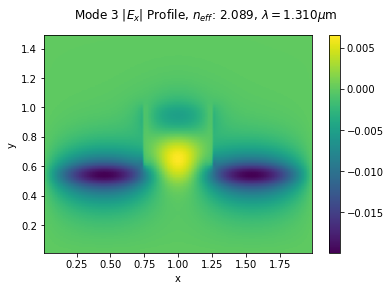

In [8]:
mode_solver = ms.ModeSolverSemiVectorial(4,semi_vectorial_method='Ex')
a = mode_solver.solve(k)
mode_solver.write_modes_to_file('example_modes_1.dat')
print(a["n_effs"].real)

In [9]:
# class calculate():
#     def __init__(self, t_soi):
#         self.t_soi = t_soi
#         self.n_eff = self.find_n_eff(t_soi)

#     def find_n_eff(self, t_soi:float) -> float:
#         _structure = self.structure(self.t_soi)
#         mode_solver = ms.ModeSolverSemiVectorial(4,boundary='AAAA',semi_vectorial_method='Ex')
#         a = mode_solver.solve(_structure)
#         return a["n_effs"].real # 구해야 하는 것 [mode : 0에서의 n_eff]
    
#     def structure(self,t_soi)->float:
#         struct = st.RidgeWaveguide(x_step = 0.02,
#         y_step = 0.02,
#         wg_height = self.t_soi-0.05,
#         wg_width = 0.5,
#         sub_height = 0.5,
#         sub_width = 10.,
#         n_sub = 1.4,
#         n_wg = 3.4,
#         n_clad = 1.,
#         wavelength = 1.550,
#         angle = 90.,
#         clad_height = 1.0,
#         film_thickness=self.t_soi)
#         return struct
#         def write_structure(self):
#         _structure = self.structure(self.t_soi)
#         _structure.write_to_file(r'./t_soi.dat')
#         def write_modes(self):
#         _structure = self.structure(self.t_soi)
#         mode_solver = ms.ModeSolverSemiVectorial(4,semi_vectorial_method='Ex')
#         mode_solver.solve(_structure)
#         mode_solver.write_modes_to_file('mode_t_soi=.dat')

In [39]:
from modesolverpy.mode_solver import _ModeSolver

class ModeSolverSemiVectorial(_ModeSolver):
    """
    A semi-vectorial mode solver object used to
    setup and run a mode solving simulation.

    Args:
        n_eigs (int): The number of eigen-values to solve for.
        tol (float): The precision of the eigen-value/eigen-vector
            solver.  Default is 0.001.
        boundary (str): The boundary conditions to use.
            This is a string that identifies the type of boundary conditions applied.
            The following options are available: 'A' - Hx is antisymmetric, Hy is symmetric,
            'S' - Hx is symmetric and, Hy is antisymmetric, and '0' - Hx and Hy are zero
            immediately outside of the boundary.
            The string identifies all four boundary conditions, in the order:
            North, south, east, west. For example, boundary='000A'. Default is '0000'.
        mode_profiles (bool): `True if the the mode-profiles should be found, `False`
            if only the effective indices should be found.
        initial_mode_guess (list): An initial mode guess for the modesolver.
        semi_vectorial_method (str): Either 'Ex' or 'Ey'.  If 'Ex', the mode solver
            will only find TE modes (horizontally polarised to the simulation window),
            if 'Ey', the mode solver will find TM modes (vertically polarised to the
            simulation window).
    """

    def __init__(
        self,
        n_eigs,
        tol=0.001,
        boundary="0000",
        mode_profiles=True,
        initial_mode_guess=None,
        semi_vectorial_method="Ex",
    ):
        self._semi_vectorial_method = semi_vectorial_method
        _ModeSolver.__init__(
            self, n_eigs, tol, boundary, mode_profiles, initial_mode_guess
        )

    @property
    def _modes_directory(self):
        modes_directory = "./modes_semi_vec/"
        if not os.path.exists(modes_directory):
            os.mkdir(modes_directory)
        _modes_directory = modes_directory
        return _modes_directory

    def _solve(self, structure, wavelength):
        self._structure = structure
        self._ms = ms._ModeSolverSemiVectorial(
            wavelength, structure, self._boundary, self._semi_vectorial_method
        )
        self._ms.solve(
            self._n_eigs,
            self._tol,
            self._mode_profiles,
            initial_mode_guess=self._initial_mode_guess,
        )
        self.n_effs = self._ms.neff

        r = {"n_effs": self.n_effs}

        if self._mode_profiles:
            r["modes"] = self._ms.modes
            self._ms.modes[0] = np.real(self._ms.modes[0])
            self._initial_mode_guess = np.real(self._ms.modes[0])

        self.modes = self._ms.modes

        return r

    def write_modes_to_file(self, filename="mode.dat", plot=True, analyse=True):
        """
        Writes the mode fields to a file and optionally plots them.

        Args:
            filename (str): The nominal filename to use for the saved
                data.  The suffix will be automatically be changed to
                identifiy each mode number.  Default is 'mode.dat'
            plot (bool): `True` if plots should be generates,
                otherwise `False`.  Default is `True`.
            analyse (bool): `True` if an analysis on the fundamental
                mode should be performed.  The analysis adds to the
                plot of the fundamental mode the power mode-field
                diameter (MFD) and marks it on the output, and it
                marks with a cross the maximum E-field value.
                Default is `True`.

        Returns:
            dict: A dictionary containing the effective indices
            and mode field profiles (if solved for).
        """
        modes_directory = "./modes_semi_vec/"
        os.remove("C:\\modes_semi_vec")
        if not os.path.isdir(modes_directory):
            os.mkdir(modes_directory)
        filename = modes_directory + filename

        for i, mode in enumerate(self._ms.modes):
            filename_mode = self._get_mode_filename(
                self._semi_vectorial_method, i, filename
            )
            self._write_mode_to_file(np.real(mode), filename_mode)

            if plot:
                if i == 0 and analyse:
                    A, centre, sigma_2 = anal.fit_gaussian(
                        self._structure.xc, self._structure.yc, np.abs(mode)
                    )
                    subtitle = (
                        "E_{max} = %.3f, (x_{max}, y_{max}) = (%.3f, %.3f), MFD_{x} = %.3f, "
                        "MFD_{y} = %.3f"
                    ) % (A, centre[0], centre[1], sigma_2[0], sigma_2[1])
                    self._plot_mode(
                        self._semi_vectorial_method,
                        i,
                        filename_mode,
                        self.n_effs[i],
                        subtitle,
                        sigma_2[0],
                        sigma_2[1],
                        centre[0],
                        centre[1],
                        wavelength=self._structure._wl,
                    )
                else:
                    self._plot_mode(
                        self._semi_vectorial_method,
                        i,
                        filename_mode,
                        self.n_effs[i],
                        wavelength=self._structure._wl,
                    )

        return self.modes

[2.9588957  2.47261394 2.2115909  2.08419808 1.96359662]


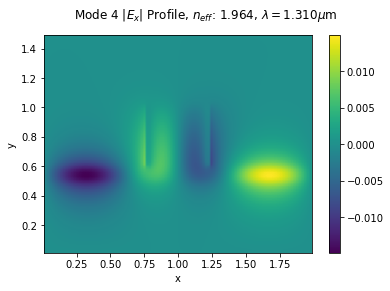

In [15]:
k = structure(0.45)
mode_solver = ms.ModeSolverSemiVectorial(5,semi_vectorial_method='Ex')
a = mode_solver.solve(k)
mode_solver.write_modes_to_file('example_modes_1.dat')
print(a["n_effs"].real)

In [13]:
t_soi_list = [round(0.0 +0.01*i,2) for i in range(0,18)]
print(t_soi_list)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]


[array([[-6.99980121e-09, -2.13009117e-08, -3.65161982e-08, ...,
         -7.28141830e-08, -6.67094543e-08, -6.37138906e-08],
        [-7.23838993e-09, -2.20305230e-08, -3.77791070e-08, ...,
         -7.50946998e-08, -6.87484361e-08, -6.56351587e-08],
        [-7.72009621e-09, -2.35039328e-08, -4.03297677e-08, ...,
         -7.96949301e-08, -7.28596841e-08, -6.95083319e-08],
        ...,
        [-1.99433873e-08, -6.04220910e-08, -1.02688480e-07, ...,
         -2.38813082e-07, -2.24444485e-07, -2.17350793e-07],
        [-1.16642378e-08, -3.53368120e-08, -6.00481004e-08, ...,
         -1.39886935e-07, -1.31506878e-07, -1.27369176e-07],
        [-3.83828379e-09, -1.16276008e-08, -1.97576695e-08, ...,
         -4.60672328e-08, -4.33136152e-08, -4.19539461e-08]]),
 array([[-6.02030458e-08-1.17799365e-07j, -1.61436329e-07-3.25470205e-07j,
         -2.69927384e-07-5.44802090e-07j, ...,
         -5.48844572e-07-9.33009024e-07j, -4.94228150e-07-8.66047412e-07j,
         -4.76748293e-07-8.22235

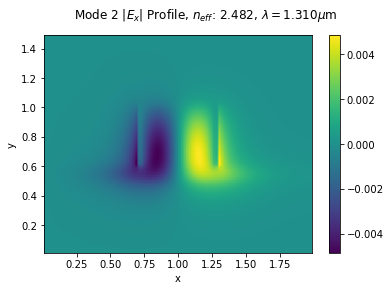

In [46]:
p = structure(0.57)
mode_solver = ms.ModeSolverSemiVectorial(3,boundary='SAAS',semi_vectorial_method='Ex')
mode_solver.solve(p)
mode_solver.write_modes_to_file('example_modes_1.dat')